In [88]:
import pyLDAvis.gensim_models as gensimvis
import pandas as pd
import numpy as np
import nltk
import re
import string
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis 


from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from kkltk.kin_kir_stopwords import stopwords

import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from kkltk.kin_kir_stopwords import stopwords
from sklearn.decomposition import LatentDirichletAllocation

In [89]:
# pip install pyLDAvis


In [90]:
# pip install kkltk

In [91]:
# pip install WordCloud

In [92]:
data =  pd.read_csv('Final_Final_Dataset_Cleaned2.csv')

In [93]:
data

,0
0,Nubwo kugeza ubu bitaragaragara niba umubyeyi ...
1,Ni ngombwa rero ko umugore utwite akaza ingamb...
2,Dukomeze kwirinda coronavirus twubahiriza inga...
3,Gukora imibonano mpuzabitsina mu gihe umugore ...
4,"Nk’uko bitangazwa n’urubuga babycenter.fr, nib..."
...,...
2645,Uruhare rwamazi mu kongera ubwiza bwawe
2646,Impamvu zishobora gutera kubira ibyuya byinshi...
2647,Ibiryo 10 byingenzi ku mugore utwite
2648,Dore ibimenyetso bishobora kukwereka niba utwite


In [94]:
data = data.rename(columns={'0': 'Content'})

In [95]:
# Sample corpus
corpus =data['Content'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)

Total number of words: 48368


In [96]:
def remove_punctuation(text):
    # Use the translate method to remove punctuation characters
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


# data['Content_cleaned'].apply(remove_english_words)
data['Content'] = data['Content'].apply(remove_punctuation)

In [97]:
# Sample corpus
corpus =data['Content'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)

Total number of words: 42894


In [98]:
# Loop through each row in the DataFrame
english_words = set(nltk.corpus.words.words())  # Get a set of English words from NLTK
cleaned_sentences = []
for index, row in data.iterrows():
    cleaned_sentence = ""
    for word in row[0].split(" "):
        cleaned_word = word.replace(".", "").replace(",", "").replace("'", "").replace("’", "")
        if cleaned_word not in english_words:
            cleaned_sentence += " " + cleaned_word
    
    cleaned_sentences.append(cleaned_sentence[1:])

# Create a new DataFrame to store cleaned people data
cleaned_DataFrame = pd.DataFrame({"Content":cleaned_sentences})

In [99]:
cleaned_DataFrame

,Content
0,Nubwo kugeza ubu bitaragaragara niba umubyeyi ...
1,Ni ngombwa rero umugore utwite akaza ingamba k...
2,Dukomeze kwirinda coronavirus twubahiriza inga...
3,Gukora imibonano mpuzabitsina gihe umugore atw...
4,Nkuko bitangazwa nurubuga babycenterfr niba ut...
...,...
2645,Uruhare rwamazi kongera ubwiza bwawe
2646,Impamvu zishobora gutera kubira ibyuya byinshi...
2647,Ibiryo 10 byingenzi ku mugore utwite
2648,Dore ibimenyetso bishobora kukwereka niba utwite


In [100]:
# Sample corpus
corpus = cleaned_DataFrame['Content'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)


Total number of words: 34501


In [101]:
# Load Kinyarwanda and Kirundi stop words
stopset_kin = stopwords.words('kinyarwanda')
stopset_kir = stopwords.words('kirundi')

# Function to remove Kinyarwanda and Kirundi stop words from the text
def remove_stopwords(text, stopwords_set):
    words = text.split()
    cleaned_words = []
    for word in words:
        if word.lower() not in stopwords_set:
            cleaned_words.append(word)
    return ' '.join(cleaned_words)

# Apply the function to remove Kinyarwanda and Kirundi stop words from the 'Content_cleaned' column
for i in range(len(cleaned_DataFrame['Content'])):
    cleaned_DataFrame['Content'][i] = remove_stopwords(cleaned_DataFrame['Content'][i], set(stopset_kin).union(stopset_kir))

# Print the DataFrame with the cleaned column
cleaned_DataFrame

,Content
0,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...
1,ngombwa umugore utwite akaza ingamba kwirinda ...
2,Dukomeze kwirinda coronavirus twubahiriza inga...
3,Gukora imibonano mpuzabitsina gihe umugore atw...
4,Nkuko bitangazwa nurubuga babycenterfr utwite ...
...,...
2645,Uruhare rwamazi kongera ubwiza bwawe
2646,Impamvu zishobora gutera kubira ibyuya byinshi...
2647,Ibiryo 10 byingenzi mugore utwite
2648,Dore ibimenyetso bishobora kukwereka utwite


In [102]:
# Sample corpus
corpus = cleaned_DataFrame['Content'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)

Total number of words: 30789


In [103]:
# Function to remove numbers from the text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to remove numbers from the 'Text' column in the DataFrame
cleaned_DataFrame['Content'] = cleaned_DataFrame['Content'].apply(remove_numbers)

# Print the DataFrame with the text without numbers


In [104]:
# Sample corpus
corpus = cleaned_DataFrame['Content'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)

Total number of words: 30019


In [105]:

# Create a PorterStemmer instance
stemmer = PorterStemmer()

# Function to apply stemming to each word in the text
def stem_text(text):
    words = word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [stemmer.stem(word) if word in english_words else word for word in words]  # Stem only English words
    return ' '.join(stemmed_words)  # Join the stemmed words back into a single string

# Apply stemming to the 'Content_cleaned' column in the DataFrame
cleaned_DataFrame['Stemmed_Text'] = cleaned_DataFrame['Content'].apply(stem_text)

# Print the DataFrame with the stemmed text
cleaned_DataFrame

,Content,Stemmed_Text
0,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...
1,ngombwa umugore utwite akaza ingamba kwirinda ...,ngombwa umugore utwite akaza ingamba kwirinda ...
2,Dukomeze kwirinda coronavirus twubahiriza inga...,Dukomeze kwirinda coronavirus twubahiriza inga...
3,Gukora imibonano mpuzabitsina gihe umugore atw...,Gukora imibonano mpuzabitsina gihe umugore atw...
4,Nkuko bitangazwa nurubuga babycenterfr utwite ...,Nkuko bitangazwa nurubuga babycenterfr utwite ...
...,...,...
2645,Uruhare rwamazi kongera ubwiza bwawe,Uruhare rwamazi kongera ubwiza bwawe
2646,Impamvu zishobora gutera kubira ibyuya byinshi...,Impamvu zishobora gutera kubira ibyuya byinshi...
2647,Ibiryo byingenzi mugore utwite,Ibiryo byingenzi mugore utwite
2648,Dore ibimenyetso bishobora kukwereka utwite,Dore ibimenyetso bishobora kukwereka utwite


In [106]:
# Sample corpus
corpus = cleaned_DataFrame['Stemmed_Text'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)

Total number of words: 30019


In [107]:
words_set = {
    'email', 'video', 'views', 'amOctober', 'babycenterfr', 'gynécologue', 'Lépais', 'bouchon', 'muqueux',
    'liquide', '“', '”', 'très', 'utvvite', 'cracher', 'wwwlamaisondesmaternellesfr', 'fécondation',
    'grossesse', 'évolutive', 'cellules', 'œuf', 'clair', 'chromosomes', 'spermatozoïdes', 'échographie',
    'aspir', 'curetage', 'Britney', 'Spears', 'Preclampsia', 'posts', '„', 'Thê', 'Fîçk', 'Gêê',
    'UMUGANGAcom', 'SADC', 'HDL', 'LDL', 'β', 'Hcg', '�', 'OMS', 'Results', 'Settings', 'Montjalinews',
    'Éclampsie', 'millimetre', 'Prééclampsie', 'Croix', 'du', 'volante', 'yimpyikoMarch', 'Sep', 'septemb',
    'Apr', 'april', 'Oct', 'octob', '©', 'Montjalinewsnet', 'USD', 'Colleges', 'published', 'Required',
    'fields', 'Website', 'Captcha', '©Umurengezi', 'Username', 'escaliers', 'tonique', 'Vehicles',
    'comments', 'Piqué', 'XVI', 'infoumuravarw', 'SupportNSDS', 'DS', 'FARG', 'karongidistrictkarongigovrw',
    '→', 'Pfizer', 'Services', 'Hospitals', 'includes', 'departments', 'patients', 'outcomes', 'goals',
    'hours', 'staffing', 'plans', 'servicesdepartment', 'Doctors', 'defines', 'facilities', 'needed',
    'AuthorityTMDA', 'Khea', 'TMDA', 'RemeraARJRMC', 'KG', 'AV', 'Xinhua', 'Prev', 'Posts', 'zi…', 'Transfers',
    'Kovacić', 'LoftusCheek', 'Cuadrado', 'Ziyech', 'RwandAir', 'Tshisekedi', 'Google', 'emailed',
    'httpswwwkigalitodaycomamakuruamakurumurwandaarticleabashinzwekwitakumirireyabananabagorebatwitebatanzeigicecyibyobagombagagutanga',
    'Improved', 'Foods', 'AgriPark', 'Silos', 'Plots', 'KigaliRwanda', 'infoafricaimprovedfoodscom',
    'Download', 'MB', 'infobugeseragovrw', 'parainage', 'infobugeseragovrw', 'r', 'Zimbraecommended',
    'Zimbra', 'Functions', 'Kinders', 'eyes', 'Contained', 'purposes', 'journalists', 'warranties',
    'implied', 'products', 'articles', 'including', 'arising', 'websites', 'sites', 'HoweverYEGOB', 'YEGOBRW',
    'takes', 'issues', 'screensho', 'Javascript', 'detected', 'required', 'settings', 'Notifications',
    'Carrasco', 'Erin', 'KN', 'infoumuryangorw', 'Lagos', 'RADIOTV', 'radioTV', 'FM', 'TV', 'Rwandaful',
    'stories', 'verified', 'NCDs', 'cg', 'subscribers', 'updates', 'offers', 'inbox', 'Women', 'Men',
    'Vit', 'DHS', 'TodayKT', 'wu', 'ki', 'Youssef', 'Rharb', 'mg', 'coldcap', 'febrilex', 'dacold',
    'coldarest', 'flucoldex', 'httpsumutihealthcomfarumasiyeumuhangamubyerekeyeimiti', 'Grossesse', 'le',
    'relaxin', '«', 'folic', 'httpsumutihealthcomakamarokafolicacidkumugoreutwite', 'bec', 'lievre',
    'httpsumutihealthcomkubyara', '❖', 'HCG', 'Cleverland', 'PreEclampsia', '.', 'clots', 'fer', 'KT',
    'Vin', 'Eau', 'javel', 'eau', 'plastike', 'Afrikmagcom', 'vitamins', 'proteins', 'subsalicylate',
    'Brompheniramine', 'Chlorpheniramine', 'Ibuprofen', 'Naproxen', 'Phenylephrine', 'PB', 'NUBW', 'ubw',
    '•', 'yaby', 'ashob', 'II', 'kg', 'III', 'BWIZAIII', '⁄', 'IV', 'N°', 'cm', 'inni', 'ikin', 'PLos',
    'Norvège', 'terre', 'UM-', 'USEKECOM', 'lendemain', 'levonorgestrel', 'vyose', 'KCUPDATESCOMhttpswwwkcupdatescom',
    '›', 'wabujijweBBChttpswwwbbccom', 'ubuzimainfohttpswwwubuzimainforw', 'gusamaUmusekehttpsarumusekerw',
    'Facebookhttpswwwfacebookcom', 'menyabyinshik', 'Impanorwhttpsimpanorw', 'Umuryangohttpsumuryangorw',
    'adrestricted', 'mugor', 'levonorgestrol', 'Umusekecom', 'hos', 'ergusa', 'years', 'EURI', 'ans',
    'Esteban', 'Landrau', 'Danna', 'Colombia', 'src', 'img', 'datalazyfallback', 'datalazyfallback',
    'decodingasync', 'loadinglazy', 'classalignnone', 'wpimage','srchttpsiwpcomimirasiretvcomwpcontentuploadsuyumugaboyahisemogutwitamucyimbocyumugorewedannasultanaexjpgresizeCssl',
    'srcsethttpsiwpcomimirasiretvcomwpcontentuploadsuyumugaboyahisemogutwitamucyimbocyumugorewedannasultanaejpgresizeCampssl',
    'httpsiwpcomimirasiretvcomwpcontentuploadsuyumugaboyahisemogutwitamucyimbocyumugorewedannasultanaejpgresizeCampssl',
    'sizesmaxwidth', 'px', 'vw', 'datarecalcdims', 'Easwood', 'leoncia', 'Ltd', 'Wu', 'Kid', 'kid', 'FASACO',
    'Asbl', 'HOMEAHABANZA', 'infomysitecom', 'fasacogmailcom', 'uwizeyeemmanuelgmailcom', 'phil', 'created',
    'Wixcom', 'Dieu', 'Goodings', 'uses', 'youre', 'ok', 'optout', 'n', 'CLADHO', 'Center', 'assessment', 'NCC',
    'yu', 'iAccelerator', 'centre', 'todayJuly', 'Ykee', 'celebrities', 'celeb', 'celebr', 'hottest', 'photos',
    'movies', 'shows', 'httpswwwthechoicelivecombanyampingabaryumyehoabandibagaragazaamarangamutimakuriprincekidnamisselsa',
    'messages', 'having', 'Howeverthis', 'popularitykindly', 'deservesthisisjolly', 'NIldephonse', 'Feb', 'HIFI',
    'LTD', 'AAP', 'Instagram', 'Telecom', 'Taarifarw', 'OEMBiremewe', 'zippers', 'flannelByoroshye', 'pricelist',
    'Infohanyunhomecom', 'hangzhouhanyuncom', 'ovulation', 'filsantejeunes', 'louismaximegmailcom',
    'wwwdusabanewordpresscom', 'blog', 'bw', 'using', 'methods', 'commenting', 'WordPresscom', 'Connecting',
    'wwwigitubaorg', 'RBCIHDPC', 'httpschemasgooglecombloggerkindpost', 'ZIGITUBA', 'notifications',
    'impanogroupgmailcom', 'JournalistFreelancer', 'LinkedIn', 'Id', 'postings', 'focusing', 'connectings',
    'hiring', 'managers', 'skills', 'endorsing', 'Getty', 'Images', 'Los', 'Podcast', 'games', 'spam', 'Akismet',
    'processed', 'aspirations', 'HDI', 'oxigene', 'w', 'y', 'EditorDr', 'Votre', 'est', 'intéressante',
    'jaimerais', 'savoir', 'aussi', 'qui', 'concerne', 'maladies', 'drépanocytose', 'AdvertisementGutwita',
    'Afrimax', 'sizefull', 'srchttpsiwpcomradiotvrwwpcontentuploadsScreenShotatpngresizeCssl',
    'srcsethttpsiwpcomradiotvrwwpcontentuploadsScreenShotatpngwampssl',
    'httpsiwpcomradiotvrwwpcontentuploadsScreenShotatpngresizeCampssl', 'hCG', 'jw', 'Tico', 'Tools', 'Flinf',
    'Huw', 'online', 'provides', 'achievements', 'Echographie', 'Src', 'umutihealth', 'PE', 'femenin', 'WHATSAPP',
    'grossess', 'uf', 'spermatozoïdes', 'BK', 'Chiffa', 'Ayoo', 'Tems', 'Titch', 'APR', 'FC', 'Sc', 'Wejscie',
    'oficjalna', 'Mostbet', 'logowanie', 'przez', 'sieci', 'spolecznosciowe' , 'all', ' rw', 'cy', 'bw','britney','spears','cy','rights','by','reserved','Share'
}


In [108]:
# List of words
words_list2 = ['fibre', 'website', 'Home', 'Éclampsie', 'vinaigre', 'Sultana', 'JoCare', 'omega', 'Prééclampsie', 'Website', 'Africa', 'Preclampsia',
              'Menu', 'Source', 'Medicine', 'Caffeine', 'Norvège', 'folique', 'Assia', 'More', 'Lorna', 'échographie', 'Linea', 'fatti', 'Private',
              'Rice', 'Welcome', 'Google', 'Free', 'programe', 'Carrasco', 'Tsunami', 'Plaza', 'LIVE', 'StarHuye', 'Office', 'Chameleone',
              'Loperamide', 'httpsumutihealthcomibyokuryaiyoutwite', 'grosse', 'môlaire', 'hydatiforme', 'Brompheniramine', 'Chlorpheniramine',
              'Phenylephrine', 'Dieu', 'Since', 'CLADHO', 'Ykee', 'Close', 'Platini', 'elsa', 'NIildephonse', 'HIFI', 'OEMBiremewe', 'Initiative',
              'AdvertisementGutwita', 'Jassu', 'LikeLike', 'Tico', 'Create', 'Choline', 'Like', 'Chiffa', 'Costa', 'Wejsci', 'Wejscie', 'kandi', 'kuko',
              'cyangwa', 'kandi', 'ndetse', 'gusa', 'cyane','cyane','gihe','ariko','hari']

# Convert the list into a set to remove duplicates
words_set2 = set(words_list2)


In [109]:

cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Stemmed_Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in english_words]))
cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in words_set]))
cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in words_set2]))
# Assuming 'Content_cleaned' is the column containing the text data
cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(lambda x: ' '.join(word for word in x.split() if len(word) > 2))

# Function to remove short words while preserving words with at least one tab space
def remove_short_words_with_tab(text):
    words = text.split()
    words_to_keep = [word for word in words if len(word) > 3]
    return ' '.join(words_to_keep)

# Apply the function to the 'Content_cleaned' column
cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(remove_short_words_with_tab)

# Replace 'specific_word' with the word you want to remove from the DataFrame
specific_word = 'guswera'

# Assuming the 'Stemmed_Text' column is already present in the DataFrame

# Use the 'str.contains' method to create a boolean mask identifying rows with the specific word
mask = cleaned_DataFrame['Content_cleaned'].str.contains(specific_word, case=False)

# Use the inverse of the mask to keep only the rows that don't contain the specific word
cleaned_DataFrame = cleaned_DataFrame[~mask]

# Reset the index if needed
cleaned_DataFrame.reset_index(drop=True, inplace=True)

# Function to remove words ending with a consonant
def remove_consonant_endings(text):
    return re.sub(r'\b\w*[^aeiouAEIOU\s\d_]\b', '', text)

# Apply the function to the 'Stemmed_Text' column
cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(remove_consonant_endings)

# Print the DataFrame with the cleaned column
cleaned_DataFrame

C:\Users\ihogo\AppData\Local\Temp\ipykernel_19096\1267842314.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_DataFrame['Content_cleaned'] = cleaned_DataFrame['Content_cleaned'].apply(remove_consonant_endings)


,Content,Stemmed_Text,Content_cleaned
0,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...,Nubwo kugeza bitaragaragara umubyeyi yakwanduz...
1,ngombwa umugore utwite akaza ingamba kwirinda ...,ngombwa umugore utwite akaza ingamba kwirinda ...,ngombwa umugore utwite akaza ingamba kwirinda ...
2,Dukomeze kwirinda coronavirus twubahiriza inga...,Dukomeze kwirinda coronavirus twubahiriza inga...,Dukomeze kwirinda twubahiriza ingamba zashyiz...
3,Gukora imibonano mpuzabitsina gihe umugore atw...,Gukora imibonano mpuzabitsina gihe umugore atw...,Gukora imibonano mpuzabitsina umugore atwite i...
4,Nkuko bitangazwa nurubuga babycenterfr utwite ...,Nkuko bitangazwa nurubuga babycenterfr utwite ...,Nkuko bitangazwa nurubuga utwite inda ukaba ki...
...,...,...,...
2638,Uruhare rwamazi kongera ubwiza bwawe,Uruhare rwamazi kongera ubwiza bwawe,Uruhare amazi kongera ubwiza bwawe
2639,Impamvu zishobora gutera kubira ibyuya byinshi...,Impamvu zishobora gutera kubira ibyuya byinshi...,Impamvu zishobora gutera kubira ibyuya byinshi...
2640,Ibiryo byingenzi mugore utwite,Ibiryo byingenzi mugore utwite,Ibiryo ingenzi mugore utwite
2641,Dore ibimenyetso bishobora kukwereka utwite,Dore ibimenyetso bishobora kukwereka utwite,Dore ibimenyetso bishobora kukwereka utwite


In [110]:
# Sample corpus
corpus = cleaned_DataFrame['Content_cleaned'].values

# Tokenize and count words in the corpus
total_words = 0
word_count = {}
for document in corpus:
    tokens = word_tokenize(document)
    total_words += len(tokens)
    for token in tokens:
        if token not in word_count:
            word_count[token] = 1
        else:
            word_count[token] += 1

print("Total number of words:", total_words)


Total number of words: 25899


In [111]:
# Print the word count in descending order
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
# for word, count in sorted_word_count:
#     print(word, count)

<h1>End of pre processing<h1>

In [112]:
# "email" in english_words

<h1>LDA topic modeling</h1>

Most common words:
umwana: 384
umugore: 367
utwite: 323
inda: 232
igihe: 168
neza: 141
atwite: 138
kugira: 138
gutwita: 133
umubyeyi: 130
muganga: 126
mbere: 121
batwite: 109
nyuma: 101
imibonano: 100
abagore: 96
gukora: 88
mpuzabitsina: 88
ubuzima: 86
kubyara: 86
agomba: 77
uburyo: 74
umuntu: 71
gusama: 70
mugore: 68
biba: 68
bishobora: 67
ikibazo: 66
umubiri: 66
munsi: 66
ashobora: 63
buryo: 61
amakuru: 60
inama: 59
afite: 58
amaraso: 55
rwanda: 55
kugeza: 54
imiti: 54
byiza: 53
avuga: 53
kurya: 53
indwara: 53
abana: 52
ufite: 51
kugirango: 50
ukwezi: 49
mwana: 48
buzima: 48
kubona: 48


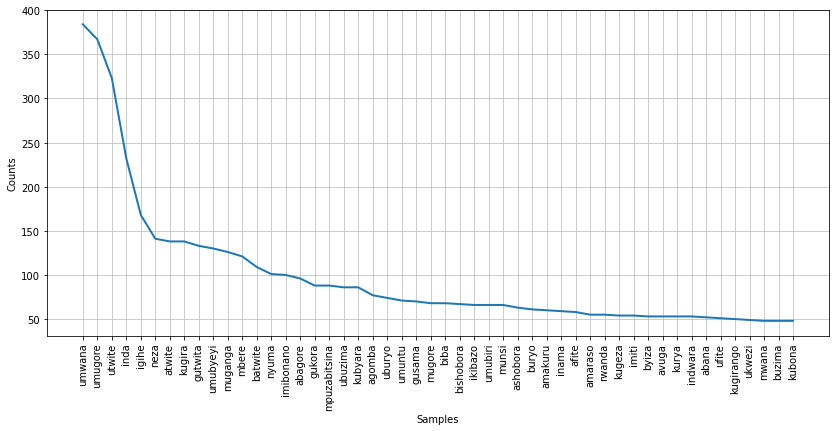

In [113]:
# Sample corpus
corpusi = cleaned_DataFrame['Content_cleaned'].values

# Tokenize the corpus
tokenized_text = [word_tokenize(document) for document in corpusi]

# Calculate word frequencies
word_freq = FreqDist([word.lower() for document in tokenized_text for word in document])

# Display the most common words
common_words = word_freq.most_common(50)
print("Most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Plot word frequency distribution
plt.figure(figsize=(14, 6))
plt.xlabel('Word')
plt.ylabel('Frequency')
word_freq.plot(50, cumulative=False)
# plt.xlabel('Word')
# plt.ylabel('Frequency')
# plt.title('Word Frequency Distribution')
# plt.xticks(rotation='vertical')
plt.show()

In [114]:
wordi=[]
freqs=[]
# Display the most common words
common_words = word_freq.most_common(30)
# print("Most common words:")
for word, freq in common_words:
#     print(freq)
    wordi.append(word)
    freqs.append(freq)

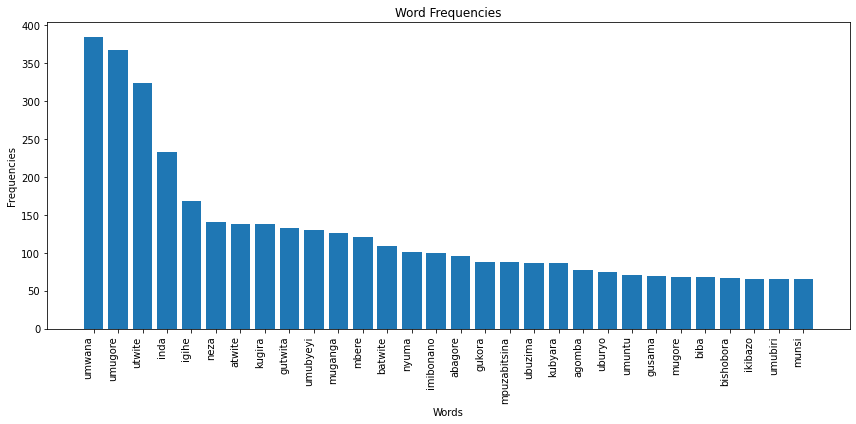

In [115]:
# Plot the word frequencies
plt.figure(figsize=(12, 6))
# plt.plot(wordi, freqs,color ='red')
plt.bar(wordi, freqs)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.xticks(rotation=90, ha="right")  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [2]:
#combine all the articles
article_data = ""
for article in list(cleaned_DataFrame['Content_cleaned'].values):
    article_data = article_data+" "+article

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 1000, height = 700, background_color='white', colormap="ocean",  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

# Sample corpus
corpusi = cleaned_DataFrame['Content_cleaned'].values

# Tokenize the corpus
tokenized_text = [word_tokenize(document) for document in corpusi]

# Convert tokenized text to a list of space-separated strings
text_as_strings = [" ".join(tokens) for tokens in tokenized_text]

# Create a CountVectorizer to convert text to a bag of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_as_strings)

# Instantiate the LDA model
lda_model = LatentDirichletAllocation(
    n_components=5,  # Number of topics
    doc_topic_prior=None,
    topic_word_prior=0.001,
    learning_method='batch',
    learning_decay= 0.7,
    learning_offset=10.0,
    max_iter=10,
    batch_size=128,
    evaluate_every=-1,
    perp_tol=1e-1,
    mean_change_tol=1e-3,
    max_doc_update_iter=100,
    n_jobs=None,
    verbose=0,
    random_state=42
)

# Fit the LDA model to the document-term matrix
lda_result = lda_model.fit_transform(X)


# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10  # Define the number of top words to print for each topic

Topic_Content =[]

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


Topic 1: umwana, utwite, umugore, neza, umubyeyi, kugira, agomba, inda, muganga, igihe
Topic 2: umugore, utwite, umwana, gukora, imibonano, mpuzabitsina, inda, nyuma, atwite, mbere
Topic 3: umwana, neza, abana, kugira, utwite, vitamini, muganga, batwite, umubyeyi, gutwita
Topic 4: umugore, utwite, inda, umwana, atwite, batwite, abagore, ubuzima, igihe, kubyimba
Topic 5: inda, igihe, gutwita, umugore, kugira, utwite, umuntu, umwana, ibimenyetso, mbere


In [129]:
# lda_model.components_
feature_names

array(['aba', 'ababa', 'ababajwe', ..., 'échographie', 'éclampsie',
       'évolutive'], dtype=object)

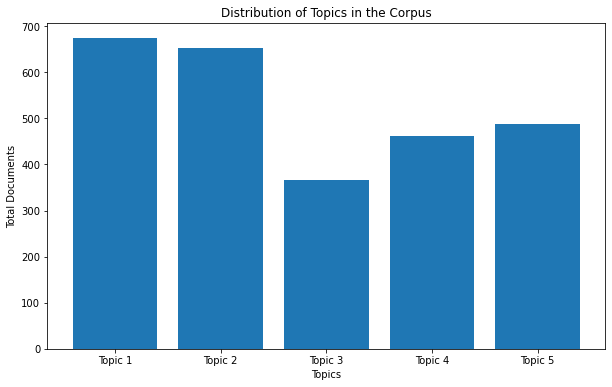

In [118]:

# Now you can create a stacked bar plot showing the distribution of topics in the corpus
topic_labels = [f"Topic {i+1}" for i in range(lda_model.n_components)]
topic_dist_sum = np.sum(lda_result, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(lda_model.n_components), topic_dist_sum, tick_label=topic_labels)
plt.xlabel('Topics')
plt.ylabel('Total Documents')
plt.title('Distribution of Topics in the Corpus')
plt.show()


In [131]:
from gensim.models.coherencemodel import CoherenceModel
dictionary = corpora.Dictionary(tokenized_text)
# Get topics from LDA model in the required format for CoherenceModel
def get_lda_topics(model, num_topics, topn=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-topn - 1:-1]]
        topics.append(topic_words)
    return topics

# Get topics in the required format
topics = get_lda_topics(lda_model, lda_model.n_components)

# Coherence Score
coherence_model = CoherenceModel(topics=topics, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.30893381097398137


In [120]:
from itertools import combinations

# Assuming 'n_top_words' is defined earlier in your code
n_top_words = 10

# Get the topics from the LDA model
topics = [topic.argsort()[:-n_top_words - 1:-1] for topic in lda_model.components_]

# Create pairs of topics
topic_pairs = list(combinations(range(len(topics)), 2))

# Print and save the pairs
for pair in topic_pairs:
    print(pair)

# Save the pairs in a variable
topic_pairs_variable = topic_pairs

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [121]:
lda_model.components_

array([[0.20000203, 0.20000102, 0.20000199, ..., 0.2000015 , 0.20124553,
        0.20000093],
       [1.19998835, 0.20000097, 0.20000185, ..., 2.19999118, 0.20000524,
        0.20000095],
       [0.20000388, 0.2000023 , 0.20000395, ..., 0.20000298, 1.35118577,
        0.20000188],
       [0.20000288, 0.20000149, 0.20000287, ..., 0.20000213, 0.2029208 ,
        0.20000133],
       [0.20000285, 2.19999422, 1.19998934, ..., 0.2000022 , 4.04464265,
        1.19999491]])

In [122]:
from gensim.matutils import hellinger

# Function to calculate Hellinger distance between two topics
def calculate_hellinger_distance(topic1, topic2):
    dist = hellinger(topic_pairs_variable[topic1],topic_pairs_variable[topic2])
    return dist

# Calculate average Hellinger distance between all pairs of topics
average_hellinger_distance = sum(calculate_hellinger_distance(i, j) for i, j in topic_pairs_variable) / len(topic_pairs_variable)
print(f"Average Topic Diversity (Hellinger Distance): {average_hellinger_distance}")


Average Topic Diversity (Hellinger Distance): 0.5379998145618252


In [123]:
# Topical Consistency (Word Overlap)
def calculate_word_overlap(topic1, topic2, lda_model):
    words1 = [feature_names[i] for i in topic1.argsort()[:-11:-1]]  # Adjust the range to get top words
    words2 = [feature_names[i] for i in topic2.argsort()[:-11:-1]]  # Adjust the range to get top words
    overlap = len(set(words1).intersection(set(words2)))
    return overlap / min(len(words1), len(words2))

# Assuming you have feature_names available from the vectorizer used in LDA
# Replace it with your actual feature_names

# Calculate average word overlap between all pairs of topics
average_word_overlap = sum(calculate_word_overlap(lda_model.components_[i], lda_model.components_[j], lda_model) for i, j in topic_pairs_variable) / len(topic_pairs_variable)
print(f"Average Topical Consistency (Word Overlap): {average_word_overlap}")


Average Topical Consistency (Word Overlap): 0.41


In [124]:
# # Calculate perplexity and scale it
# perplexity = lda_model.perplexity(X)
# scaled_perplexity = 1 / perplexity

# print(f"Scaled Perplexity: {scaled_perplexity}")

# pyLDAvs

In [125]:
# pip install pyLDAvis

In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
# import pyLDAvis.gensim_models as gensimvis

# Assuming 'documents' is your list of preprocessed documents
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_as_strings)

# Create a Gensim dictionary from the vectorizer vocabulary
gensim_dict = Dictionary.from_corpus(Sparse2Corpus(X, documents_columns=False), id2word=dict((i, word) for i, word in enumerate(vectorizer.get_feature_names_out())))

# Specify the number of topics
num_topics = 4
lda_model_sklearn = LatentDirichletAllocation(n_components=num_topics,  doc_topic_prior=None,
    topic_word_prior=None,
    learning_method='batch',
    learning_decay=0.9,
    learning_offset=10.0,
    max_iter=100,
    batch_size=256,
    evaluate_every=-1,
    perp_tol=1e-1,
    mean_change_tol=1e-3,
    max_doc_update_iter=100,
    n_jobs=None,
    verbose=0, random_state=42)
lda_sklearn_transformed = lda_model_sklearn.fit_transform(X)

# Convert scikit-learn LDA model to Gensim
corpus = Sparse2Corpus(X, documents_columns=False)
lda_model_gensim = LdaModel(corpus, id2word=gensim_dict, num_topics=n_components)

# Transform the Gensim LDA model to the pyLDAvis format
vis_data = gensimvis.prepare(lda_model, corpus, dictionary=dictionary)




In [133]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvish

# Save the visualization to an HTML file
# pyLDAvis.save_html(vis_data, 'lda_visualization_2.html')